[toc]

# Sklearn XGBoost Api

In [3]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
data = iris['data']
target = iris['target']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data, target)

In [17]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
xgb.score(x_test, y_test)

0.9473684210526315

## feature_importances_

xgboost 可以对特征计算重要性。有三种重要性计算方式 weight, gain 和 cover

下面的解释来自于 [Python API Reference — xgboost 1.2.0-SNAPSHOT documentation](https://xgboost.readthedocs.io/en/latest/python/python_api.html?highlight=plot_importance#module-xgboost.plotting)

”weight” is the number of times a feature appears in a tree

”gain” is the average gain of splits which use the feature

”cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split

In [20]:
xgb.feature_importances_

array([0.00683264, 0.08740437, 0.6484024 , 0.25736058], dtype=float32)

可以使用 plot_importance 来可视化

Text(0.5, 1.0, '')

Text(0.5, 1.0, '')

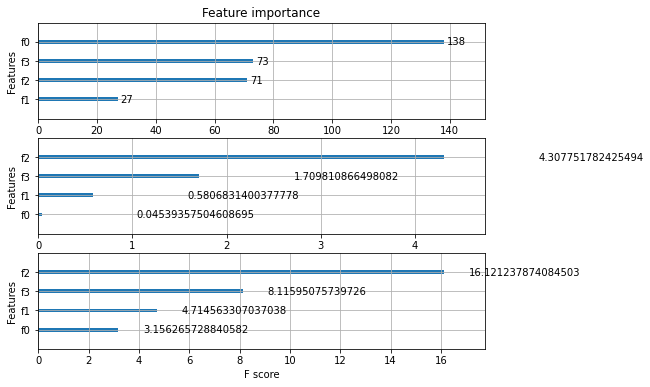

In [33]:
from xgboost import plot_importance
from matplotlib import pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(8,6))
plot_importance(xgb, importance_type='weight', ax=axes[0])
plot_importance(xgb, importance_type='gain', ax=axes[1])
plot_importance(xgb, importance_type='cover', ax=axes[2])
axes[1].set_title("")
axes[2].set_title("")

可以看到，三种方式度量出来的重要性不尽相同。

## 可视化树结构

打印前5棵树

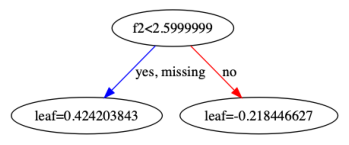

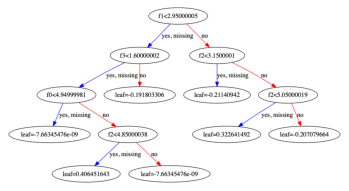

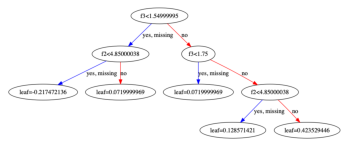

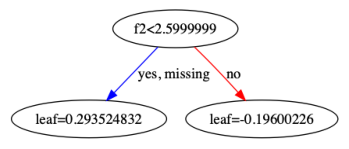

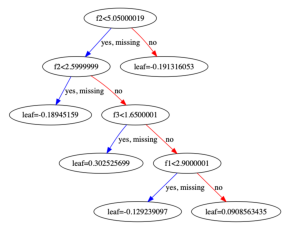

In [13]:
from xgboost import plot_tree

for i in range(5):
    plot_tree(xgb, num_trees=i)